In [17]:
'''About Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

'''

"About Dataset\nContext\nIt is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.\n\nContent\nThe dataset contains transactions made by credit cards in September 2013 by European cardholders.\nThis dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.\n\nIt contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transacti

In [18]:
 #import standard lib
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sb
 import warnings
 warnings.filterwarnings('ignore')

In [19]:
#to load csv file
df=pd.read_csv('/content/drive/MyDrive/Deep Learning/project/creditcard.csv')

In [20]:
#check data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
#here output variable is class
#value 1 in case of fraud and 0 for not fraud.
#here v1 to v28 column not important

In [22]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

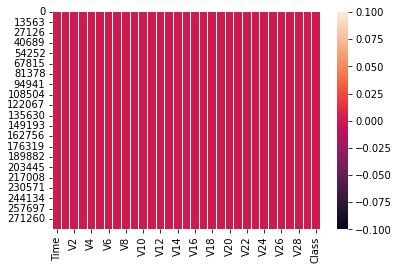

In [23]:
#check in visualise form
#using seaborn heatmap method
sb.heatmap(df.isnull())
plt.show()
#there is a no null value

In [24]:
#cross check to check datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

0    284315
1       492
Name: Class, dtype: int64


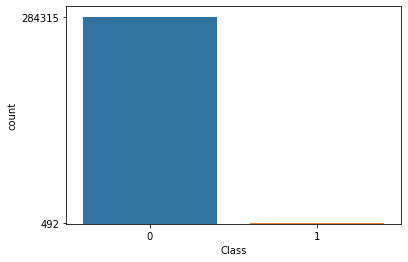

In [25]:
#check data is bal or not in output variable
f=df['Class'].value_counts()
print(f)
sb.countplot(data=df,x='Class')
plt.yticks(f)
plt.show()
#here data is unbalanced
#diff between majority and minority class is big
#here cat in output variable is 2 so it is binary classification problem

In [26]:
#select input and output from given dataset
X=df[['Time','Amount']] #select input 
Y=df['Class'] #select output

In [27]:
#check duplicated values
df.duplicated().sum()
#here 1081 are duplicated value

1081

In [28]:
#delete duplicate values
df.drop_duplicates(inplace=True)

In [29]:
X.head()

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99


In [31]:
#check duplicated values again
df.duplicated().sum()
#here 0 are duplicated value

0

In [32]:
#apply train_test_split on 70% training data and 30% testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
X_train.shape,X_test.shape

((199364, 2), (85443, 2))

In [34]:
#check data in output
Y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [35]:
#convert minority class to majority class
#using random over sampler method
from imblearn.over_sampling import RandomOverSampler

In [36]:
#create object of RandomOverSampler class
ros=RandomOverSampler(random_state=1)
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [37]:
#check bal
Y_train1.value_counts()
#here data is bal

0    199007
1    199007
Name: Class, dtype: int64

In [38]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [39]:
#check bal
Y_test1.value_counts()
#here data is bal

0    85308
1    85308
Name: Class, dtype: int64

In [40]:
#to check Y_test1
#here is bal
Y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [41]:
#apply standard scaler on X_train1 and X_test1
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class ss
ss=StandardScaler()
X_train1=ss.fit_transform(X_train1) #convert to numpy array
X_test1=ss.transform(X_test1) #convert to numpy array

In [42]:
#check how many row and col
X.shape
#here 30 input
#Thumb rules
#how to decide no of neaurons in hidden layers
#no of inputs + no of neauron in output layer

(284807, 2)

In [43]:
#create neaural network 
import tensorflow as tf
#create object of Sequential class
model=tf.keras.Sequential([
    #first hidden layer 
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(X.shape[1],)),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu'),
    #Third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu'),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),
    #output layer 31*1+1=32
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [44]:
#check summary
#formula of no of parameters in each layers=(no of input * no of neaurons) + no of bias
#para of hidden layer=30*31+31=961
#para of output layer=31*!+1=32
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [45]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
#create a procedure for early stopping 
from tensorflow.keras.callbacks import EarlyStopping
cb=EarlyStopping(monitor='val_loss', #val_loss means testing loss
                 min_delta=0.0001,
                 patience=20,
                 verbose=1,
                 mode='auto',
                 baseline=None,
                 restore_best_weights=False)

In [47]:
#to train the model with 70% data
train_model=model.fit(X_train1,Y_train1,epochs=5000,batch_size=64,
                      validation_data=(X_test1,Y_test1),callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.5657 - accuracy: 0.7094 - val_loss: 0.6339 - val_accuracy: 0.6789
Epoch 2/5000
6219/6219 [==============================] - 17s 3ms/step - loss: 0.5145 - accuracy: 0.7453 - val_loss: 0.6444 - val_accuracy: 0.6750
Epoch 3/5000
6219/6219 [==============================] - 15s 2ms/step - loss: 0.4953 - accuracy: 0.7556 - val_loss: 0.6810 - val_accuracy: 0.6776
Epoch 4/5000
6219/6219 [==============================] - 16s 3ms/step - loss: 0.4801 - accuracy: 0.7640 - val_loss: 0.7466 - val_accuracy: 0.6583
Epoch 5/5000
6219/6219 [==============================] - 15s 2ms/step - loss: 0.4661 - accuracy: 0.7702 - val_loss: 0.8138 - val_accuracy: 0.6595
Epoch 6/5000
6219/6219 [==============================] - 16s 3ms/step - loss: 0.4540 - accuracy: 0.7762 - val_loss: 0.8671 - val_accuracy: 0.6777
Epoch 7/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.4447 - accuracy: 0.7813 - val_loss: 0

In [48]:
#model evaluation
print("Trainig loss and accurancy : ",model.evaluate(X_train1,Y_train1))
print("Testing loss and accurancy : ",model.evaluate(X_test1,Y_test1))
#here training score is 77%
#testing score is 66%
#so difference is more and model is overfit
#increased 
#to reduced overfiting use regularization

12438/12438 [==============================] - 17s 1ms/step - loss: 0.3444 - accuracy: 0.8368
Trainig loss and accurancy :  [0.34442761540412903, 0.8368449211120605]
5332/5332 [==============================] - 7s 1ms/step - loss: 1.8688 - accuracy: 0.6601
Testing loss and accurancy :  [1.8687928915023804, 0.660143256187439]


In [49]:
model.get_weights()
#get_weights() inbuild function

[array([[-5.3204030e-01,  3.2899812e-02, -4.3303102e-01, -4.1429299e-01,
         -4.8741838e-01,  5.5821527e-02, -4.9396858e-01, -1.6933039e-02,
         -7.2772570e-02,  1.9715376e-01, -2.2938274e-01, -7.2319645e-01,
         -5.0918621e-01,  1.7255960e-02, -1.7824374e-01, -5.7169229e-01,
         -9.2709837e-03,  1.7593810e-02,  6.6811222e-01,  5.9122890e-01,
         -2.7521882e-02, -6.8551570e-01,  5.4270869e-01,  7.4565512e-01,
          5.1158762e-01,  8.4912539e-02, -4.2617130e-01,  2.9984140e-01,
          5.1044548e-01, -4.2554593e-01, -7.7297515e-03, -3.3387744e-01,
          2.2299200e-01,  3.0847773e-01, -1.0642907e-01,  2.1975122e-01,
         -1.6275658e-01, -8.6183567e-03, -1.2678188e-01,  3.5516578e-01,
          3.4616038e-02,  9.2469797e-02, -8.5808885e-01,  3.9175111e-01,
          1.7285827e-01,  5.5810198e-02,  2.8743500e-01, -1.5484526e-02,
          2.0051549e-01, -3.1633246e-01,  4.2814907e-01,  2.0459200e-01,
         -5.2382100e-01, -2.1269311e-01,  5.4484373

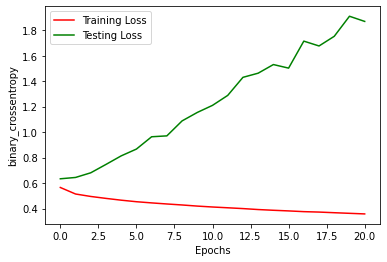

In [50]:
#visaulisation to loss training graph and testing graph
#train_model
plt.plot(train_model.history['loss'],label="Training Loss",color='red')
plt.plot(train_model.history['val_loss'],label="Testing Loss",color='green')
plt.xlabel("Epochs")
plt.ylabel("binary_crossentropy")
plt.legend()
plt.show()

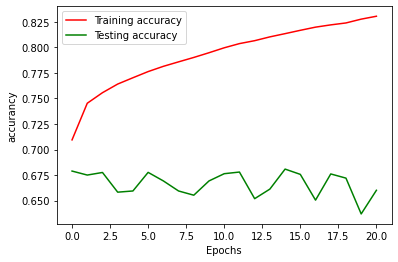

In [51]:
''#visaulisation to accurancy of training graph and testing graph
#train_model
plt.plot(train_model.history['accuracy'],label="Training accuracy",color='red')
plt.plot(train_model.history['val_accuracy'],label="Testing accuracy",color='green')
plt.xlabel("Epochs")
plt.ylabel("accurancy")
plt.legend()
plt.show()

In [52]:
#clearly understand model is overfit
#so to remove overfitting problem use overfitting method first
#use dropout
#dropout always in between 20% to 50%
#create neaural network
import tensorflow as tf
from tensorflow.keras.layers import Dropout
#create object of Sequential class
model1=tf.keras.Sequential([
    #create first hidden layer
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(X.shape[1],)),
    Dropout(0.30),#30% dropout
    #create second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu'),Dropout(0.30),#30% dropout
    #create third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu'),Dropout(0.30),#30% dropout
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),Dropout(0.30), #30% dropout
    #create output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [53]:
#compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
#to train the model with 70% data
train_model1=model1.fit(X_train1,Y_train1,epochs=5000,batch_size=64,
                        validation_data=(X_test1,Y_test1),callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.6408 - accuracy: 0.6383 - val_loss: 0.6135 - val_accuracy: 0.6630
Epoch 2/5000
6219/6219 [==============================] - 16s 3ms/step - loss: 0.5944 - accuracy: 0.6938 - val_loss: 0.6021 - val_accuracy: 0.6788
Epoch 3/5000
6219/6219 [==============================] - 16s 3ms/step - loss: 0.5808 - accuracy: 0.7064 - val_loss: 0.5928 - val_accuracy: 0.6814
Epoch 4/5000
6219/6219 [==============================] - 16s 3ms/step - loss: 0.5741 - accuracy: 0.7108 - val_loss: 0.6016 - val_accuracy: 0.6873
Epoch 5/5000
6219/6219 [==============================] - 22s 3ms/step - loss: 0.5698 - accuracy: 0.7139 - val_loss: 0.6046 - val_accuracy: 0.6699
Epoch 6/5000
6219/6219 [==============================] - 16s 3ms/step - loss: 0.5676 - accuracy: 0.7161 - val_loss: 0.5959 - val_accuracy: 0.6816
Epoch 7/5000
6219/6219 [==============================] - 16s 3ms/step - loss: 0.5663 - accuracy: 0.7174 - val_loss: 0

In [55]:
#model evaluation
print("Trainig loss and accurancy : ",model1.evaluate(X_train1,Y_train1))
print("Testing loss and accurancy : ",model1.evaluate(X_test1,Y_test1))
#here training score > testting score 
#and difference is 4
#model is overfit
#and score also not good

12438/12438 [==============================] - 18s 1ms/step - loss: 0.5198 - accuracy: 0.7477
Trainig loss and accurancy :  [0.5198153257369995, 0.7476847767829895]
5332/5332 [==============================] - 7s 1ms/step - loss: 0.6062 - accuracy: 0.6804
Testing loss and accurancy :  [0.6062478423118591, 0.6804285645484924]


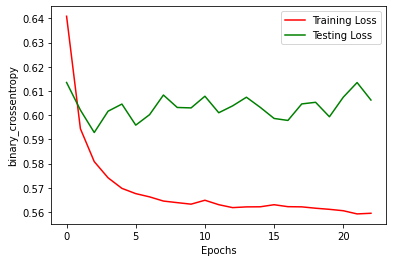

In [56]:
#visaulisation to loss training graph and testing graph
#train_model
plt.plot(train_model1.history['loss'],label="Training Loss",color='red')
plt.plot(train_model1.history['val_loss'],label="Testing Loss",color='green')
plt.xlabel("Epochs")
plt.ylabel("binary_crossentropy")
plt.legend()
plt.show()

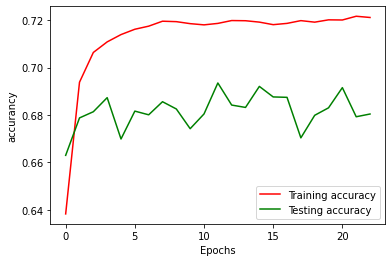

In [57]:
''#visaulisation to accurancy of training graph and testing graph
#train_model
plt.plot(train_model1.history['accuracy'],label="Training accuracy",color='red')
plt.plot(train_model1.history['val_accuracy'],label="Testing accuracy",color='green')
plt.xlabel("Epochs")
plt.ylabel("accurancy")
plt.legend()
plt.show()

In [58]:
#clearly understand model is overfit
#use 2nd overfitting method regularisation l2
#create neaural network 
from tensorflow.keras import regularizers
#create object of Sequential class
model2=tf.keras.Sequential([
    #first hidden layer 
    tf.keras.layers.Dense(units=64,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),input_shape=(X.shape[1],)),Dropout(0.20),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.20),
    #third hidden layer 
    tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.20),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),Dropout(0.30), #30% dropout
    #output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))
])

In [59]:
#compile the model
model2.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
#to train the model with 70% data
train_model2=model2.fit(X_train1,Y_train1,epochs=5000,batch_size=64,
                      validation_data=(X_test1,Y_test1),callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.7029 - accuracy: 0.5657 - val_loss: 0.6912 - val_accuracy: 0.5359
Epoch 2/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.6888 - accuracy: 0.5688 - val_loss: 0.6891 - val_accuracy: 0.5365
Epoch 3/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.6876 - accuracy: 0.5712 - val_loss: 0.6897 - val_accuracy: 0.5347
Epoch 4/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.6866 - accuracy: 0.5730 - val_loss: 0.6874 - val_accuracy: 0.5588
Epoch 5/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.6863 - accuracy: 0.5731 - val_loss: 0.6866 - val_accuracy: 0.5724
Epoch 6/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.6855 - accuracy: 0.5747 - val_loss: 0.6854 - val_accuracy: 0.5654
Epoch 7/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.6853 - accuracy: 0.5746 - val_loss: 0

In [61]:
#model evaluation
print("Trainig loss and accurancy : ",model2.evaluate(X_train1,Y_train1))
print("Testing loss and accurancy : ",model2.evaluate(X_test1,Y_test1))
#testing score and training score  same
#but score is not good

12438/12438 [==============================] - 20s 2ms/step - loss: 0.6798 - accuracy: 0.5806
Trainig loss and accurancy :  [0.6797589063644409, 0.5806227922439575]
5332/5332 [==============================] - 8s 1ms/step - loss: 0.6832 - accuracy: 0.5754
Testing loss and accurancy :  [0.6832335591316223, 0.5753681063652039]


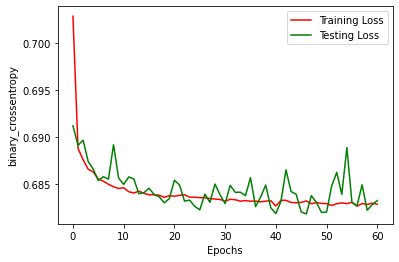

In [62]:
#visaulisation to loss training graph and testing graph
#train_model
plt.plot(train_model2.history['loss'],label="Training Loss",color='red')
plt.plot(train_model2.history['val_loss'],label="Testing Loss",color='green')
plt.xlabel("Epochs")
plt.ylabel("binary_crossentropy")
plt.legend()
plt.show()

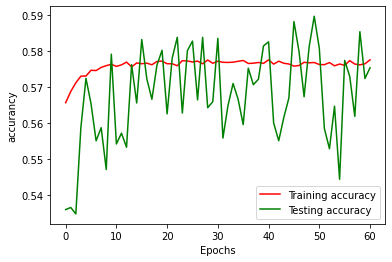

In [63]:
''#visaulisation to accurancy of training graph and testing graph
#train_model
plt.plot(train_model2.history['accuracy'],label="Training accuracy",color='red')
plt.plot(train_model2.history['val_accuracy'],label="Testing accuracy",color='green')
plt.xlabel("Epochs")
plt.ylabel("accurancy")
plt.legend()
plt.show()

In [64]:
#Find the predicttion means test the model with 30% data
Y_pred=model.predict(X_test1).round(2)

5332/5332 [==============================] - 7s 1ms/step


In [66]:
#generate classsification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.81      0.70     85308
           1       0.73      0.52      0.61     85308

    accuracy                           0.66    170616
   macro avg       0.68      0.66      0.66    170616
weighted avg       0.68      0.66      0.66    170616

[[68698 16610]
 [41030 44278]]


In [67]:
#conclusion
#here recall and f1-score is less because category of fraud transaction data is very less
#so accuracy of model also less.